# Understanding Logistic Regression and Its Applications

#### **What is Logistic Regression?**
Logistic regression is a statistical method in machine learning used to model the probability of a categorical outcome based on one or more predictor variables. Unlike linear regression, which predicts continuous outputs, logistic regression is designed for classification tasks. It maps the output of a linear equation to a probability range (0 to 1) using the logistic (sigmoid) function, making it suitable for predicting categorical outcomes.

#### **Why Choose Logistic Regression Over Linear Regression?**
When the target variable is categorical (e.g., yes/no, true/false), linear regression is not ideal as it can produce outputs outside the range of 0 to 1, leading to misinterpretations. Logistic regression, however, is specifically built to handle such cases, ensuring accurate predictions and interpretable results. It excels in binary classification tasks and can also be extended to handle multi-class classification problems.

#### **Problems That Logistic Regression Can Solve**
1. **Binary Classification Problems:**
   - Predicting whether an email is spam or not.
   - Diagnosing if a tumor is malignant or benign.
   - Determining customer churn (yes/no).

2. **Multi-Class Classification Problems (with extensions):**
   - Classifying handwritten digits (e.g., 0 to 9).
   - Categorizing news articles (e.g., sports, politics, entertainment).

3. **Event Prediction:**
   - Estimating the likelihood of a user clicking on an ad.
   - Predicting whether a loan applicant will default.

4. **Risk Assessment:**
   - Assessing the probability of a patient developing a specific disease.
   - Identifying fraudulent insurance claims.

5. **Customer Behavior Prediction:**
   - Predicting whether a customer will make a purchase.
   - Estimating subscription renewal likelihood.

6. **Operational Decisions:**
   - Predicting machinery maintenance requirements.
   - Classifying the outcomes of quality control tests.

#### **Key Benefits of Logistic Regression**
- **Probability-Based Predictions:** Logistic regression estimates probabilities, allowing for confidence levels in predictions.  
- **Feature Interpretability:** The coefficients in logistic regression indicate the influence of each predictor variable on the outcome.  
- **Versatility:** While primarily used for binary classification, logistic regression can handle multi-class problems through extensions like one-vs-rest or softmax.  
- **Simplicity and Efficiency:** Logistic regression is computationally efficient and interpretable, making it ideal for many real-world applications.

In summary, logistic regression is a powerful and flexible tool for addressing a wide range of classification problems, providing actionable insights and reliable predictions in various domains.

In [1]:
import pandas as pd
import numpy as np

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
titanic_df=pd.read_csv('/content/sample_data/titanic_train.csv')

In [4]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Here’s a one-sentence description for each feature in the Titanic dataset:

1. **PassengerId**: A unique identifier assigned to each passenger.  
2. **Survived**: Indicates whether the passenger survived (1) or did not survive (0).  
3. **Pclass**: The ticket class of the passenger (1 = 1st class, 2 = 2nd class, 3 = 3rd class).  
4. **Name**: The full name of the passenger.  
5. **Sex**: The gender of the passenger (male/female).  
6. **Age**: The age of the passenger in years (may include null values).  
7. **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic.  
8. **Parch**: The number of parents or children the passenger had aboard the Titanic.  
9. **Ticket**: The ticket number assigned to the passenger.  
10. **Fare**: The fare paid by the passenger for the ticket.  
11. **Cabin**: The cabin number assigned to the passenger (many missing values).  
12. **Embarked**: The port of embarkation for the passenger (C = Cherbourg, Q = Queenstown, S = Southampton).  

In [5]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Exploratory Data Analysis: Missing Data Analysis

In this section, we will analyze and visualize the missing data in the Titanic dataset. Missing data can significantly impact the quality of our analysis, so understanding its extent and distribution is crucial.

#### Visualizing Missing Data
To start, we use the `isnull()` function on the DataFrame to identify missing values. This function returns `True` for missing values and `False` otherwise. Using this information, we generate a heatmap with `seaborn` to visually identify missing values.

Here we can see the code used for this visualization:
```python
# Identifying missing values
titanic_df.isnull()

# Visualizing missing values using a heatmap
sns.heatmap(titanic_df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
```

In the heatmap:
- Each yellow dash represents a missing value (`True`).
- From the heatmap, we observe:
  - Missing values in the **Age** column.
  - A significant number of missing values in the **Cabin** column.
  - A small number of missing values in the **Embarked** column.

#### Percentage of Missing Data
To quantify the missing data, we calculate the percentage of missing values for each column:
```python
# Calculating the percentage of missing values
missing_percentage = (titanic_df.isnull().sum() / len(titanic_df)) * 100
print(missing_percentage)
```

The results are as follows:
- **Age**: ~20% missing.
- **Cabin**: ~77% missing.
- **Embarked**: <1% missing.

#### Handling Missing Data
1. **Age Column**:  
   The proportion of missing values in the **Age** column (~20%) is small enough to allow for reasonable data imputation. This means we can use information from other columns (e.g., **Pclass**, **Sex**) to estimate and fill in the missing values in a statistically sound manner.

2. **Cabin Column**:  
   The **Cabin** column has ~77% missing values, which is too significant for effective imputation. Instead:
   - We might consider dropping this column entirely.
   - Alternatively, we can transform it into a new feature, such as a binary **Cabin Known** column (1 for known cabins, 0 for missing cabins).

3. **Embarked Column**:  
   Since the missing data in the **Embarked** column is less than 1%, it can be filled with the most frequent value or another appropriate replacement.

---

This analysis provides a clear strategy for handling missing data before proceeding with further exploratory data analysis or modeling. Addressing missing values appropriately is crucial for ensuring robust and accurate predictions.

In [7]:
titanic_df.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

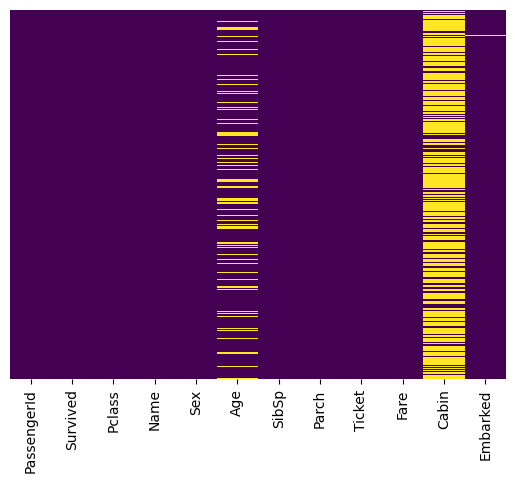

In [8]:
sns.heatmap(titanic_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
missing_percentage=(titanic_df.isnull().sum()/len(titanic_df))*100
print(missing_percentage)

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64


We will visualize the survival data to observe the distribution of those who survived versus those who didn’t. From the plot, we can see that males are significantly less likely to survive, with their non-survival rate being roughly twice that of females.

In [10]:
# darkgrid, whitegrid, dark, white, ticks
sns.set_style('ticks')

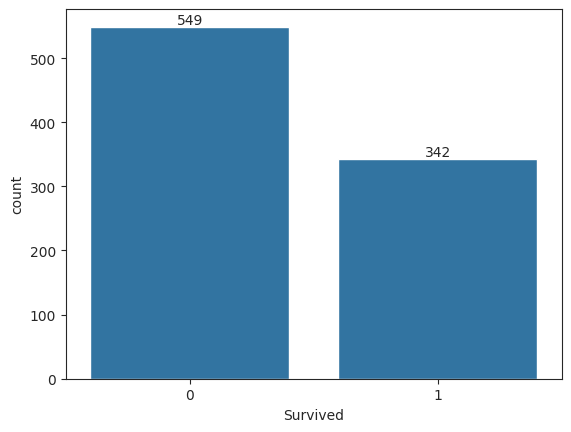

In [11]:
ax= sns.countplot(titanic_df,x='Survived')
# Annotate bars with the count
for bar in ax.patches:
    ax.annotate(
        text=f'{int(bar.get_height())}',  # The height of the bar is the count
        xy=(bar.get_x() + bar.get_width() / 2, bar.get_height()),  # Position of the annotation
        ha='center',  # Center alignment
        va='bottom'   # Position slightly above the bar
    )

# Show the plot
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

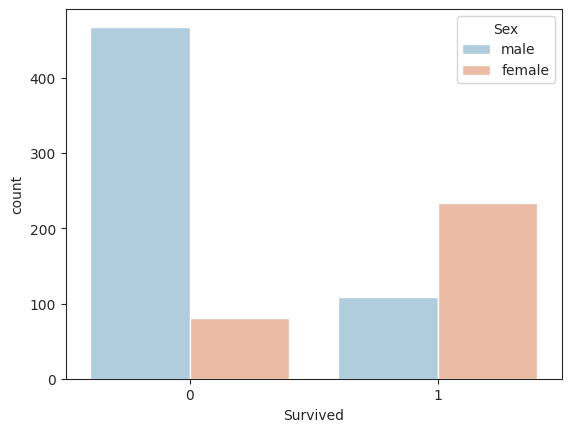

In [12]:
sns.countplot(x='Survived',data=titanic_df,hue='Sex',palette='RdBu_r')

### Binning Age

Using a continuous variable like Age for the hue argument may not work as expected, because hue is typically used with categorical variables. If you want to use Age, you may need to bin it into age groups first.

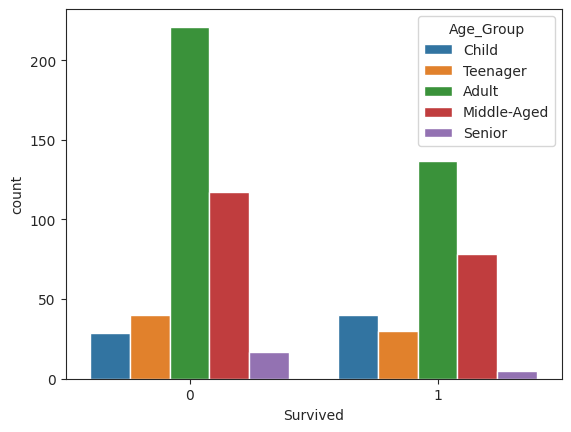

In [13]:
# Create age groups
titanic_df['Age_Group'] = pd.cut(titanic_df['Age'], bins=[0, 12, 18, 35, 60, 100],
                                 labels=['Child', 'Teenager', 'Adult', 'Middle-Aged', 'Senior'])

# Plot with age groups as hue
sns.countplot(x='Survived', data=titanic_df, hue='Age_Group')
plt.show()



1.   plt.gca().containers: Accesses the bar containers in the current axis.
2.   plt.bar_label(container): Annotates each bar in the container with its height (the count).
3.   fmt='%d': Ensures the numbers are displayed as integers.

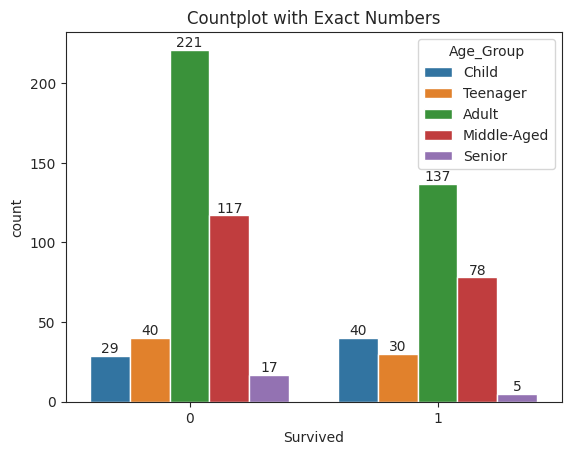

In [14]:
sns.countplot(x='Survived', data=titanic_df, hue='Age_Group')

# Add annotations
for container in plt.gca().containers:
    plt.bar_label(container, fmt='%d')  # Add bar labels with integer formatting

plt.title("Countplot with Exact Numbers")
plt.show()


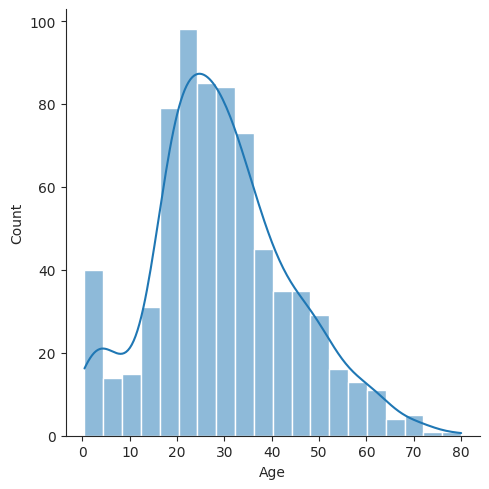

In [15]:
sns.displot(titanic_df['Age'].dropna(),kde=True,bins=20)

<Axes: ylabel='Frequency'>

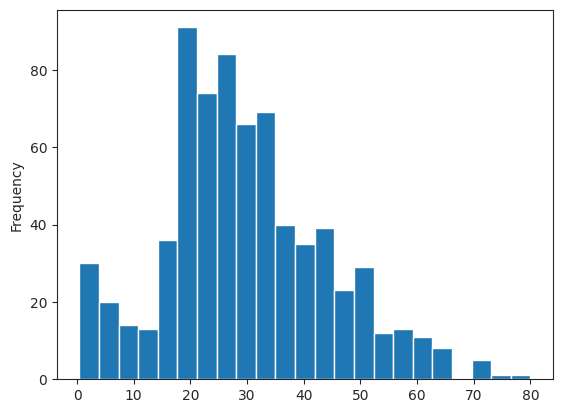

In [16]:
titanic_df['Age'].plot.hist(bins=23)

It reveals that the majority of people who did not survive were predominantly from the third class.

<Axes: xlabel='Survived', ylabel='count'>

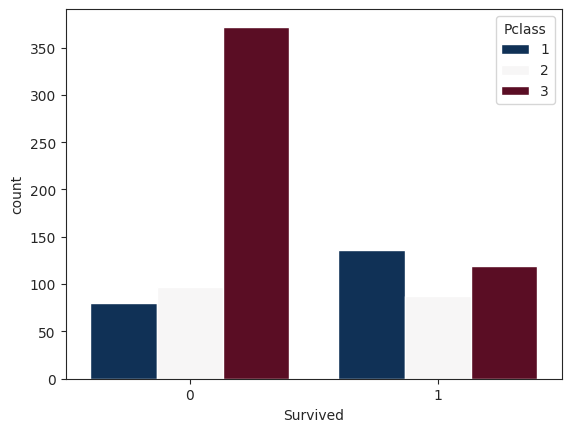

In [17]:
sns.countplot(x='Survived',data=titanic_df,hue='Pclass',palette='RdBu_r')

From this plot, we can observe that most passengers had no siblings or spouses aboard the Titanic, as indicated by the highest count at zero in the `SibSp` column. This suggests that many passengers were likely traveling alone, possibly men in third class who were emigrating or seeking work opportunities. The smaller counts for higher values of `SibSp` indicate that fewer families or groups were traveling together, which aligns with the idea that traveling in large groups might have been less common due to economic or logistical reasons. Additionally, the presence of passengers with multiple siblings or spouses highlights the diversity in family dynamics and travel arrangements among different classes and demographics.




<Axes: xlabel='SibSp', ylabel='count'>

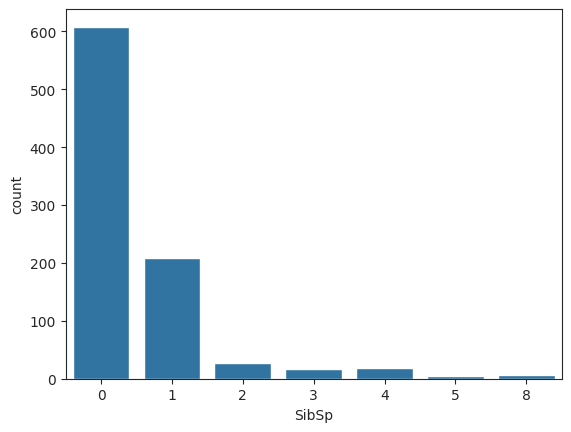

In [18]:
sns.countplot(data=titanic_df,x='SibSp')

The fare distribution is mostly between 0 and 100, which makes sense since the majority of passengers were from third class, where ticket prices were more affordable.

<Axes: >

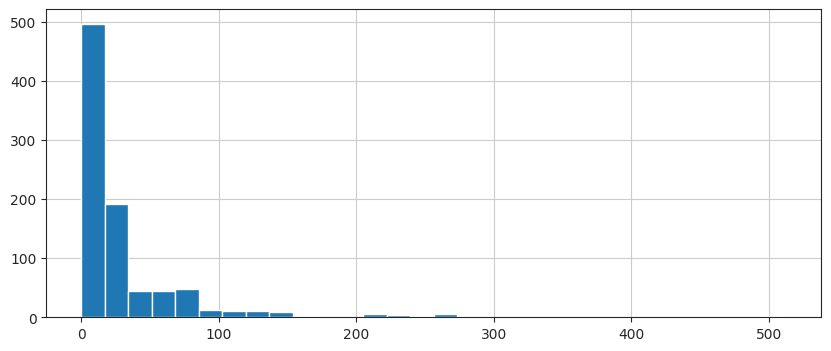

In [19]:
titanic_df['Fare'].hist(bins=30,figsize=(10,4))

In [20]:
import cufflinks as cf

In [21]:
cf.go_offline()

In [22]:
!pip install plotly


In [23]:
import plotly.express as px
import plotly.graph_objects as go


In [24]:
# titanic_df['Fare'].iplot(kind='hist',bins=30)

## Cleaning Data

To handle the missing values in the Age column, we will first perform some additional exploration.

The Boxplot shows that:
* 1st Class passengers are generally older than 2nd and 3rd Class passengers and 3rd Class passengers have a wider age range, with many younger passengers.
* The age distribution in the 3rd Class seems more spread out, while 1st Class passengers are more concentrated around a narrower age range.
* There are some outliers in all classes, but particularly in 3rd Class, suggesting there are a few extreme ages in that category

**Outliers**:

Both 1st Class and 3rd Class have a few outliers, but 3rd Class seems to have more. These could be passengers who are much older or younger than the majority.
The 2nd Class distribution seems to have fewer outliers compared to the other two classes.

**Skewness**:

The 1st Class age distribution appears to be more symmetric, while the 3rd Class age distribution may be slightly right-skewed, as there are younger passengers, but it also has a few older passengers.

We can then use the average age values based on the passenger's class to impute the missing age data.

<Axes: xlabel='Pclass', ylabel='Age'>

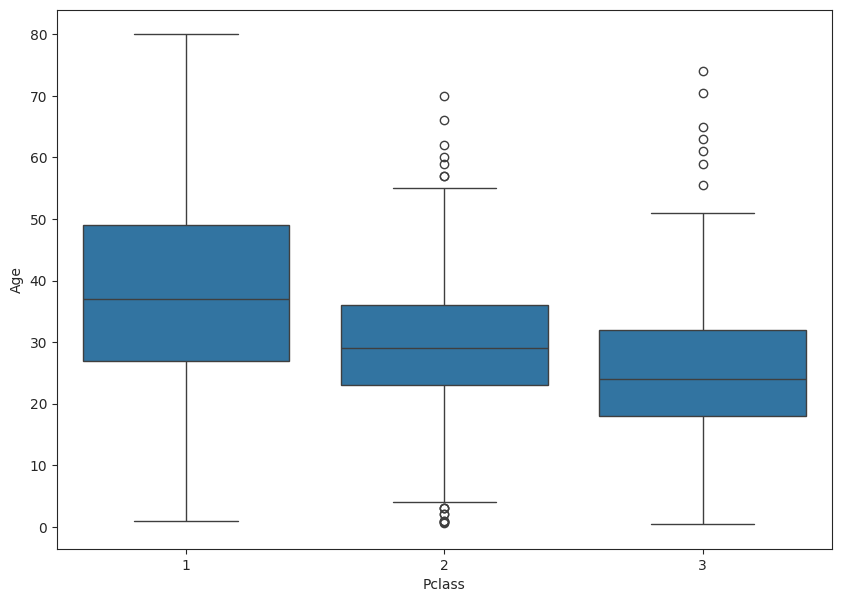

In [25]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=titanic_df)

In [26]:
def impute_age(cols):
  Age=cols[0]
  Pclass=cols[1]
  if pd.isnull(Age):
    if Pclass==1:
      return titanic_df[titanic_df['Pclass']==1]['Age'].mean()
    elif Pclass==2:
      # 29
      return titanic_df[titanic_df['Pclass']==2]['Age'].mean()
    else:
      # 24
      return titanic_df[titanic_df['Pclass']==3]['Age'].mean()
  else:
    return Age


In [27]:
titanic_df['Age']=titanic_df[['Age','Pclass']].apply(impute_age,axis=1)

<ipython-input-26-b6c98f489e12>:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

<ipython-input-26-b6c98f489e12>:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

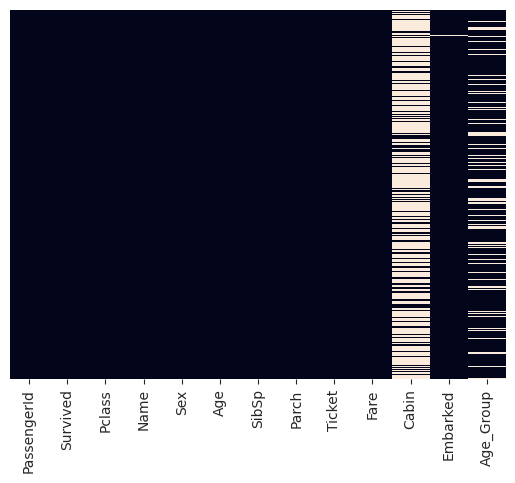

In [28]:
sns.heatmap(data=titanic_df.isnull(),yticklabels=False,cbar=False)

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64
Empty DataFrame
Columns: [Pclass, Age]
Index: []


<Axes: xlabel='Pclass', ylabel='Age'>

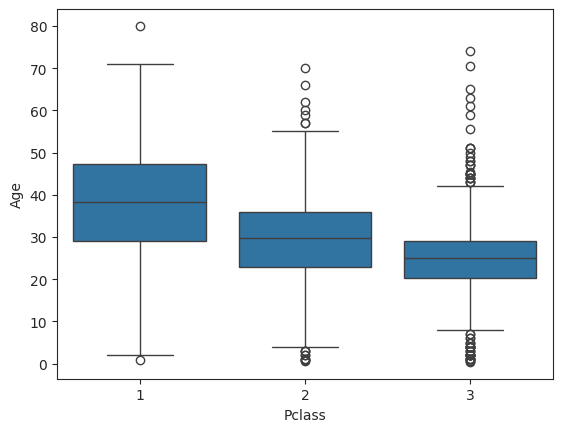

In [29]:
# Group by 'Pclass' and check the mean of 'Age'
imputed_age_by_class = titanic_df.groupby('Pclass')['Age'].mean()

print(imputed_age_by_class)

# checking the rows where 'Age' was imputed (null before imputation)
imputed_rows = titanic_df[titanic_df['Age'].isnull()]
print(imputed_rows[['Pclass', 'Age']])

# The distribution of 'Age' per 'Pclass' after imputation
sns.boxplot(x='Pclass', y='Age', data=titanic_df)


In [30]:
titanic_df.drop('Cabin',axis=1,inplace=True)

In [31]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Adult
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Middle-Aged
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Adult
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Adult
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Adult


In [32]:
titanic_df = titanic_df.drop(columns=['Age_Group'])


<Axes: >

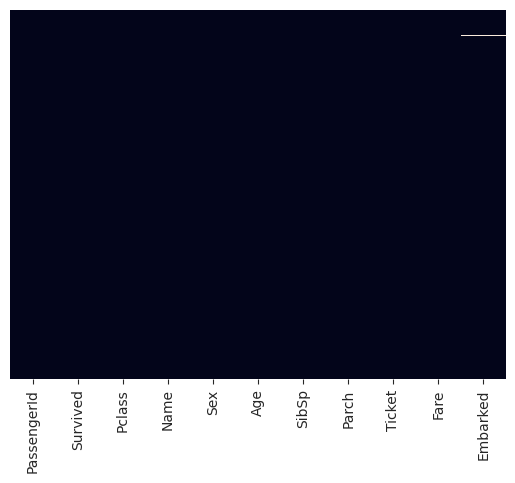

In [33]:
sns.heatmap(data=titanic_df.isnull(),yticklabels=False,cbar=False)

In [34]:
titanic_df = titanic_df.dropna(subset=['Embarked'])
# or the following
# titanic_df.dropna(inplace=True)

<Axes: >

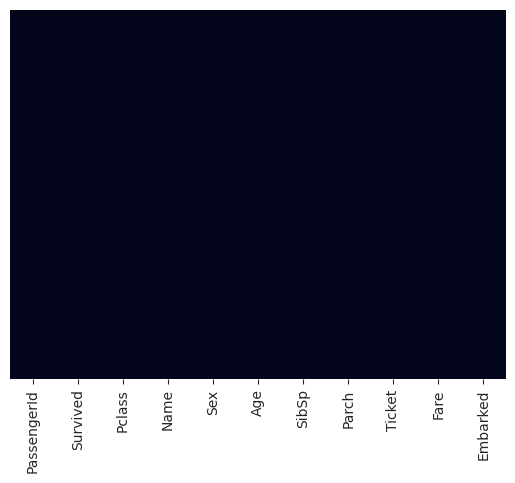

In [35]:
sns.heatmap(data=titanic_df.isnull(),yticklabels=False,cbar=False)

### Dealing with Categorical Features

Machine learning algorithms require numerical input and cannot process categorical variables directly. To address this, we use **dummy variables**, which are binary (0 or 1) representations of categorical data. Each unique category in a feature is assigned a new column, with `1` indicating the presence of the category and `0` indicating its absence.

For example, in the `Sex` column, a dummy encoding creates two columns: one for "Male" and another for "Female." If a passenger is male, the "Male" column is `1`, and the "Female" column is `0`. This allows the algorithm to process the categorical data numerically.

However, when encoding categorical variables, an issue called **multicollinearity** can arise. Multicollinearity occurs when dummy variables are perfectly correlated because the presence of one category can be inferred from the others. For example, if you include both "Male" and "Female" columns, knowing the value of one automatically determines the other, creating redundancy.

To prevent multicollinearity and ensure efficient modeling, we use the `drop_first=True` argument in `pd.get_dummies()`. This drops the first dummy variable column and uses the remaining columns to represent all categories. For instance, in the `Embarked` column, which has categories `C`, `Q`, and `S`, dropping the first column (`C`) leaves only `Q` and `S`. If both `Q` and `S` are `0`, the passenger must have embarked at `C`.

This ensures that no information is lost while avoiding redundant predictors. The processed data, like the following example, can now be fed into machine learning algorithms:
```python
embark = pd.get_dummies(titanic_df['Embarked'], drop_first=True)
```

**Definition**: A **dummy variable** is a binary indicator variable (0 or 1) used to represent categories in a dataset numerically, enabling machine learning algorithms to process categorical features.

In [40]:
sex=pd.get_dummies(titanic_df['Sex'], drop_first=True)

In [41]:
embark=pd.get_dummies(titanic_df['Embarked'], drop_first=True)

In [42]:
embark.head()

,Q,S
0,False,True
1,False,False
2,False,True
3,False,True
4,False,True


In [43]:
titanic_df=pd.concat([titanic_df,sex,embark],axis=1)

In [44]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,False,False,True
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,True,False,True


In [46]:
titanic_df.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [47]:
titanic_df.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,True,False,True
1,2,1,1,38.0,1,0,71.2833,False,False,False
2,3,1,3,26.0,0,0,7.9250,False,False,True
3,4,1,1,35.0,1,0,53.1000,False,False,True
4,5,0,3,35.0,0,0,8.0500,True,False,True


In [48]:
titanic_df.drop('PassengerId',axis=1, inplace=True)

In [49]:
titanic_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True
3,1,1,35.0,1,0,53.1000,False,False,True
4,0,3,35.0,0,0,8.0500,True,False,True


In [52]:
pclass=pd.get_dummies(titanic_df['Pclass'],drop_first=True)
titanic_df=pd.concat([titanic_df,pclass],axis=1)
titanic_df.head()
# pclass

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,22.0,1,0,7.2500,True,False,True,False,True
1,1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,3,26.0,0,0,7.9250,False,False,True,False,True
3,1,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,3,35.0,0,0,8.0500,True,False,True,False,True


In [53]:
titanic_df.drop('Pclass',axis=1,inplace=True)

In [54]:
titanic_df.head()

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,True,False,True,False,True
1,1,38.0,1,0,71.2833,False,False,False,False,False
2,1,26.0,0,0,7.9250,False,False,True,False,True
3,1,35.0,1,0,53.1000,False,False,True,False,False
4,0,35.0,0,0,8.0500,True,False,True,False,True


### Training Logistic Regression Model

In [76]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [67]:
titanic_df.columns

Index(['Survived', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S', 2, 3], dtype='object')

In [83]:
# X=titanic_df[['Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S','2', '3']]
X=titanic_df.drop('Survived',axis=1)
y=titanic_df['Survived']

In [84]:
X.rename(columns={ 2:'Pclass_2',3:'Pclass_3'},inplace=True)

In [85]:
y.head()
X.head()

,Age,SibSp,Parch,Fare,male,Q,S,Pclass_2,Pclass_3
0,22.0,1,0,7.2500,True,False,True,False,True
1,38.0,1,0,71.2833,False,False,False,False,False
2,26.0,0,0,7.9250,False,False,True,False,True
3,35.0,1,0,53.1000,False,False,True,False,False
4,35.0,0,0,8.0500,True,False,True,False,True


In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [87]:
lgr=LogisticRegression()

In [88]:
lgr.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [89]:
prediction=lgr.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       163
           1       0.84      0.68      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.80      0.81       267
weighted avg       0.83      0.82      0.82       267



In [92]:
from sklearn.metrics import confusion_matrix

In [93]:
# calling true value, vs our predictions
confusion_matrix(y_test,prediction)

array([[149,  14],
       [ 33,  71]])